In [15]:
#Load libraries
library(ggplot2)
library(dplyr)

In [16]:
spon_sentiment_df <- na.omit(read.csv("/home/hao/Downloads/SPON_All.csv", fileEncoding="UTF-16"))
head(spon_sentiment_df)

X,year,month,day,positiv_abs,neutral_abs,negativ_abs,positiv_rel,neutral_rel,negativ_rel
1,2001,1,1,4,4,12,0.02015050,0.01856187,0.05886288
2,2001,1,2,35,103,135,0.01619442,0.04036150,0.05168048
3,2001,1,3,69,120,120,0.03148833,0.05794016,0.05850294
4,2001,1,4,26,49,93,0.01867812,0.03444513,0.06457513
5,2001,1,5,45,102,133,0.02115049,0.04602044,0.05967728
6,2001,1,8,42,100,100,0.02182266,0.05149365,0.05300146


In [17]:
spon_sentiment_byYear <- spon_sentiment_df %>% 
  group_by(year) %>%
  summarise(sum_positiv_abs = sum(positiv_abs), sum_neutral_abs = sum(neutral_abs), sum_negativ_abs = sum(negativ_abs), sum_positiv_rel = sum(positiv_rel), sum_neutral_rel = sum(neutral_rel), sum_negativ_rel = sum(negativ_rel))
head(spon_sentiment_byYear)

year,sum_positiv_abs,sum_neutral_abs,sum_negativ_abs,sum_positiv_rel,sum_neutral_rel,sum_negativ_rel
2001,17061,40026,45843,7.425997,16.55480,21.39019
2002,19963,46281,58506,7.344617,16.39999,22.20849
2003,20419,47891,58816,7.652336,16.81190,22.13802
2004,21964,50029,63053,7.699428,16.59420,22.28493
2005,28573,66727,86556,7.424398,16.82071,22.16016
2006,35739,82787,105757,7.410265,17.30626,22.47152


In [18]:
calc_polarity <- function(positiv, neutral, negativ) {
    sum <- positiv + neutral + negativ
    polarity <- (positiv - negativ) / sum;
    polarity
}

sum_polarity <- mapply(calc_polarity, positiv = spon_sentiment_byYear$sum_positiv_abs, neutral = spon_sentiment_byYear$sum_neutral_abs, negativ = spon_sentiment_byYear$sum_negativ_abs)

In [19]:
spon_sentiment_byYear <- cbind(spon_sentiment_byYear, sum_polarity)
head(spon_sentiment_byYear)

year,sum_positiv_abs,sum_neutral_abs,sum_negativ_abs,sum_positiv_rel,sum_neutral_rel,sum_negativ_rel,sum_polarity
2001,17061,40026,45843,7.425997,16.55480,21.39019,-0.2796269
2002,19963,46281,58506,7.344617,16.39999,22.20849,-0.3089619
2003,20419,47891,58816,7.652336,16.81190,22.13802,-0.3020389
2004,21964,50029,63053,7.699428,16.59420,22.28493,-0.3042593
2005,28573,66727,86556,7.424398,16.82071,22.16016,-0.3188402
2006,35739,82787,105757,7.410265,17.30626,22.47152,-0.3121859


`geom_smooth()` using method = 'loess'


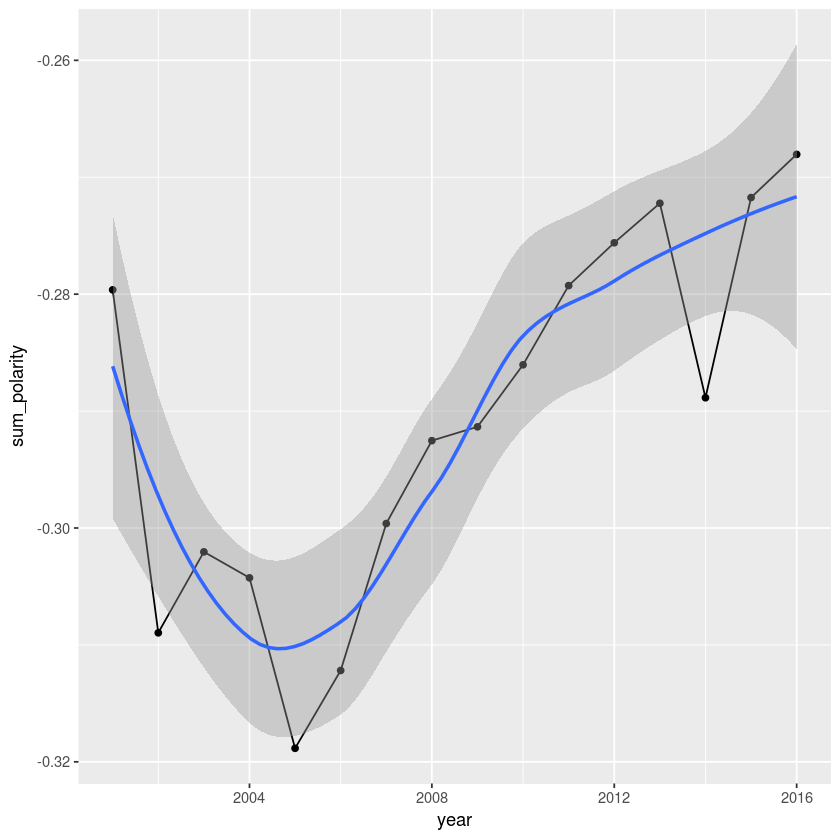

In [31]:
ggplot(spon_sentiment_byYear, aes(x = year, y = sum_polarity)) + geom_line() +  geom_point() + geom_smooth()